<a href="https://colab.research.google.com/github/naveen09peesari/AIML_1339/blob/main/AIML_lab%2007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
cancer = datasets.load_breast_cancer()
print("Data Dictionary Keys:", cancer.keys())

Data Dictionary Keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

In [4]:
print("Target classes:", cancer.target_names)

Target classes: ['malignant' 'benign']


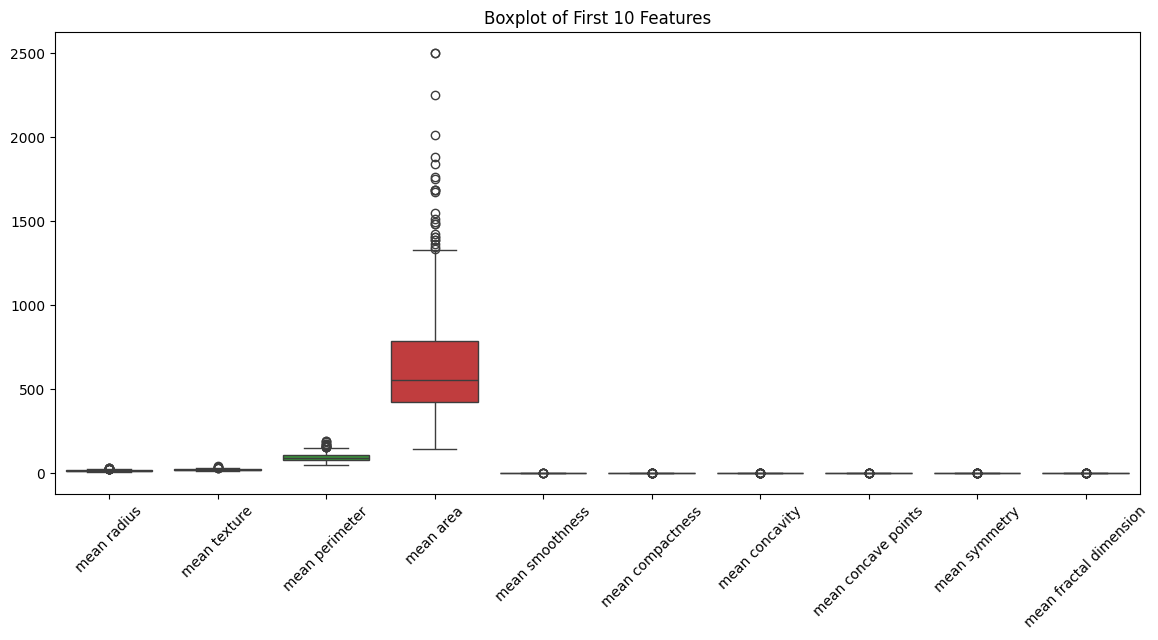

In [5]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df.iloc[:, :10])
plt.xticks(rotation=45)
plt.title('Boxplot of First 10 Features')
plt.show()


In [6]:
X = df.drop('target', axis=1)
y = df['target']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = SVC()
model.fit(X_train, y_train)


SVC()

In [9]:
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
 [[37  6]
 [ 0 71]]


In [12]:

param_grid = {
      'C': [0.1, 1, 10, 100, 1000],
       'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=1)

In [13]:
print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


In [14]:
grid_predictions = grid.predict(X_test)
print("Improved Classification Report:\n", classification_report(y_test, grid_predictions))
print("Improved Confusion Matrix:\n", confusion_matrix(y_test, grid_predictions))

Improved Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Improved Confusion Matrix:
 [[39  4]
 [ 2 69]]
